In [10]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from pathlib import Path

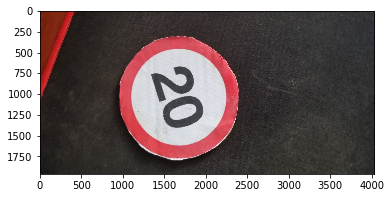

In [11]:
image = imread("article/exdata.jpg")
plt.imshow(image);

In [13]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

# Modified from the https://github.com/aleju/imgaug
seq = iaa.Sequential(
    
    [
        # Resize the image to 256x256 
        iaa.Resize({"height":256,"width":256}),
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 20% of all images
        # crop images by -5% to 10% of their height/width
        sometimes(iaa.CropAndPad(
            percent=(-0.05, 0.1),
            pad_mode=ia.ALL
        )),
        sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees
            shear=(-16, 16), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
        ))

    ],
    random_order=True
)


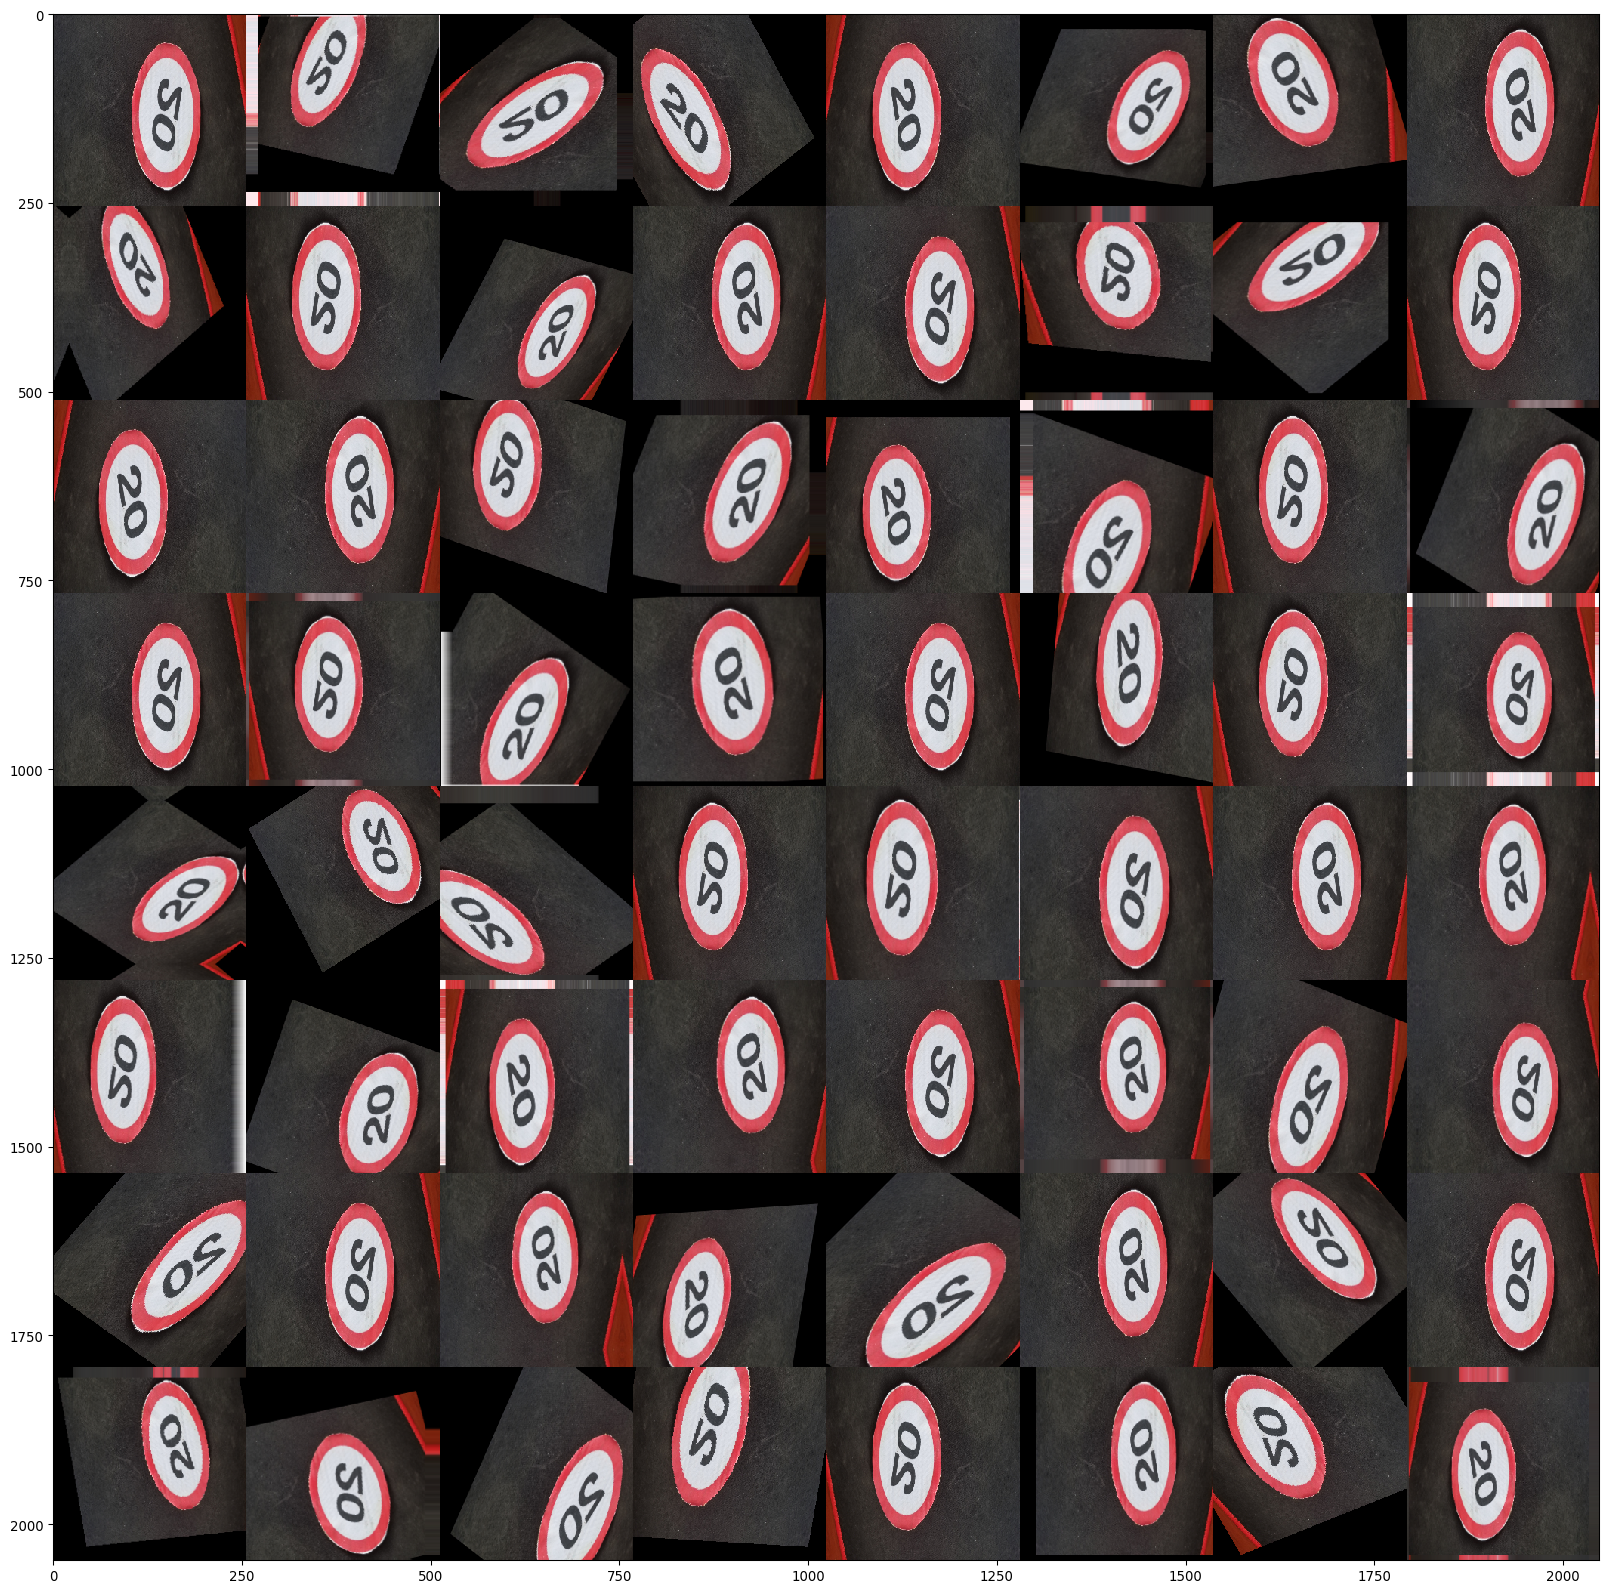

In [15]:
seq.show_grid(image, cols=8, rows=8)

<class 'numpy.ndarray'>


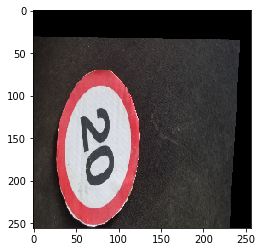

In [14]:
aug = seq.augment_image(image)
print(type(aug))
plt.imshow(aug);

In [19]:
p = Path("TrafficSigns/")

In [20]:
NAUGMENTATION = 64
for path in p.iterdir():
    if path.is_dir():
        for image_path in path.glob("*.jpg"):
            image = imread(image_path.as_posix())
            for i in range(NAUGMENTATION):
                name = image_path.name
                new_name = f"{path.as_posix()}/AUG-{i}-{name}"
                aug = seq.augment_image(image)
                plt.imsave(new_name,aug)